In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

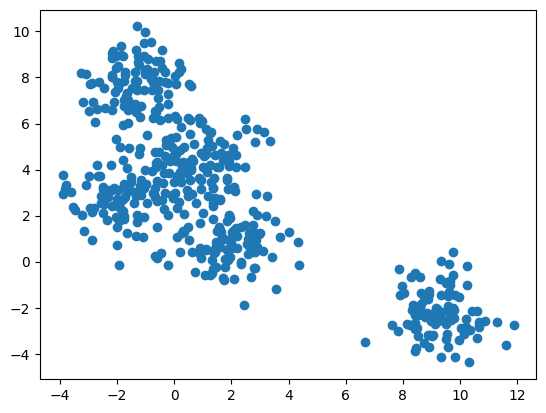

In [3]:
plt.scatter(X,Y)

In [4]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [5]:
def Distance(P1, P2):
    ### Enter Code to find distance between 2 points
    dist = np.sqrt((P1.x - P2.x)**2 + (P1.y - P2.y)**2)
    return dist

def Mean(AP):
    ### Enter Code to find mean of a list of points
    mean_x = 0
    mean_y = 0
    for point in AP:
        mean_x += point.x
        mean_y += point.y
    mean_x /= len(AP)
    mean_y /= len(AP)

In [7]:
def MinPoint(P, AP):
    ### To find the group a point P belongs to given centroids AP
    return min(AP, key=lambda centroid: Distance(P, centroid))



In [9]:
def equality(A1, A2):
    ### Check if A1 and A2 arrays are same or not(same values)
    if len(A1) != len(A2):
        return False
    for i in range(len(A1)):
        if (A1[i].x != A2[i].x or A1[i].y != A2[i].y):
            return False
    return True

In [10]:

def Mean(points):
    if not points:
        return None
    x_mean = np.mean([p.x for p in points])
    y_mean = np.mean([p.y for p in points])
    return Point(x_mean, y_mean)

In [12]:
def kMeans(X, Y, k):
    ### kM is the final list of k-Centroids, kMi is initial chosen random points(choose random k points from dataset), and D is dictionary of the groups, {Centroid : [Points in group]}
    random_indices = np.random.choice(len(X), k, replace=False)
    kMi = [Point(X[i], Y[i]) for i in random_indices]

    kM = kMi
    flag = True
    while flag:
        D = {centroid: [] for centroid in kM}

        for i in range(len(X)):
            point = Point(X[i], Y[i])
            nearest_centroid = MinPoint(point, kM)
            D[nearest_centroid].append(point)

        new_centroids = [Mean(D[centroid]) for centroid in kM]

        if equality(kM, new_centroids):
            flag = False
        else:
            kM = new_centroids

    return kM, kMi, D

In [13]:
def sumSqDist(kM, D):
    distSum = 0
    for i in range(len(kM)):
        points = D[kM[i]]
        for point in points:
            distSum += Distance(kM[i], point)
    return distSum / len(kM)

def Elbow(X, Y, kmax):
    ### For 1 to a reasonable value, find out Sum squared distance to centroid/k, and list out in an array to find optimal k using Elbow method
    lowestDist = 1e5
    kList = []
    for k in range(1, kmax+1):
        kM, kMi, D = kMeans(X, Y, k)
        kList.append(sumSqDist(kM, D))

    return kList

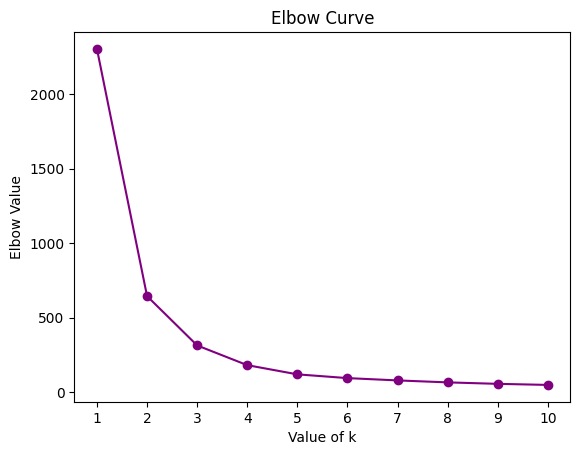

In [14]:
### Here, plot the elbow curve
kmax = 10
elbow = Elbow(X, Y, kmax)
plt.plot(np.arange(1, kmax+1), elbow, marker = 'o', color='purple')
plt.xticks(np.arange(1, kmax+1))
plt.xlabel("Value of k")
plt.ylabel("Elbow Value")
plt.title('Elbow Curve')
plt.show()

In [15]:
def generate_colors(num_colors):
    hexadecimal_alphabets = '0123456789ABCDEF'
    return ["#" + ''.join(random.choice(hexadecimal_alphabets) for _ in range(6)) for _ in range(num_colors)]

In [16]:
def plot_clusters(centroids, initial_centroids, clusters, colors):
    for idx, (centroid, points) in enumerate(clusters.items()):
        for point in points:
            plt.scatter(point.x, point.y, color=colors[idx])

    initial_x, initial_y = zip(*[(p.x, p.y) for p in initial_centroids])
    final_x, final_y = zip(*[(c.x, c.y) for c in centroids])

    plt.scatter(initial_x, initial_y, color="black", label="Initial Centroids")
    plt.scatter(final_x, final_y, color="red", label="Final Centroids")
    plt.legend()
    plt.show()

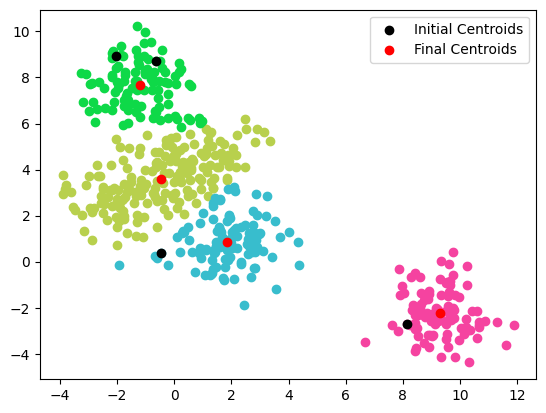

In [18]:
k=4
kM, kMi, D = kMeans(X, Y, k)
colors = generate_colors(k)
plot_clusters(kM, kMi, D, colors)